In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Sieć neuronowa

In [86]:
class Layer:
    
    def __init__(self, num_neurons, num_arg, activate_fun):
        self.weight_array = np.zeros((num_neurons, num_arg))
        self.bias_array = np.zeros((num_neurons, 1))
        self.activate_fun = activate_fun
    
    def forward(self, arguments_array):
        # print(self.weight_array.shape, arguments_array.shape)
        f = self.weight_array @ arguments_array + self.bias_array
        g = self.activate_fun(f)
        return g

class Network:
    
    def __init__(self, size_layers, size_input, activate_fun_array):
        self.size_layers = size_layers
        self.size_input = size_input

        num_arg = [size_input] + size_layers
        self.layers = [Layer(size_layers[i], num_arg[i], activate_fun_array[i]) for i in range(len(size_layers))]
    
    def forward(self, arguments_array):
        for layer in self.layers:
            arguments_array = layer.forward(arguments_array)
        return arguments_array   
        
def sigmoid(v):
    v = v.astype(np.longdouble)
    # return np.exp(v) / (np.exp(v) + 1)
    return 1.0 / (1.0 + np.exp(-v))

def linear(v):
    v = v.astype(np.longdouble)
    return v

### Dane

In [87]:
ss_train = pd.read_csv('NN\\regression\\square-simple-training.csv', dtype=np.longdouble)
sl_train = pd.read_csv('NN\\regression\\steps-large-training.csv', dtype=np.longdouble)

## Square-simple

In [88]:
N_ss_train = Network([44, 1], 1, [sigmoid, linear])
w_val = 20

N_ss_train.layers[0].weight_array = np.ones_like(N_ss_train.layers[0].weight_array) * w_val
N_ss_train.layers[0].bias_array = np.flip(np.linspace(ss_train['x'].max(), ss_train['x'].min(), num=N_ss_train.layers[0].bias_array.shape[0], endpoint=False)).reshape(-1, 1) * (-1)

N_ss_train.layers[1].bias_array = np.array([ss_train['y'][np.argmin(ss_train['x'])]]).reshape(1, 1)
weight_array = [ss_train['y'][np.argmin(ss_train['x'])]]
for i in range(0, N_ss_train.layers[1].weight_array.shape[1]):
    temp_df = (ss_train['x'] - N_ss_train.layers[0].bias_array[i][0]*(-1)).abs()
    weight_array.append((ss_train['y'][np.argmin(temp_df)] - sum(weight_array)) * 2)
N_ss_train.layers[1].weight_array = np.array(weight_array[1:]).reshape(N_ss_train.layers[1].weight_array.shape)
N_ss_train.layers[0].bias_array = N_ss_train.layers[0].bias_array * w_val

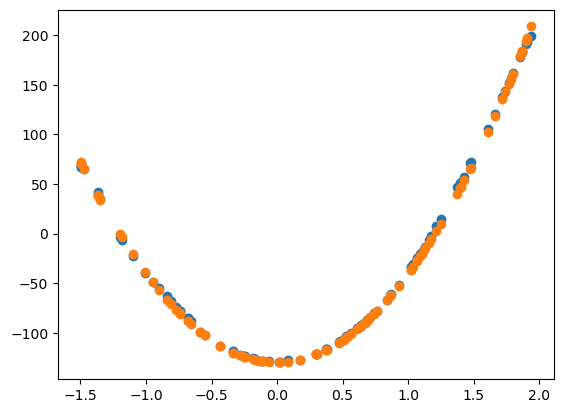

In [89]:
y = [N_ss_train.forward(ss_train['x'].values[i].reshape(1, 1))[0][0] for i in range(len(ss_train['x'].values))]
plt.scatter(ss_train['x'], y)
plt.scatter(ss_train['x'], ss_train['y'])

### Square-simple MSE

In [90]:
np.mean((np.array(y)-ss_train['y']) ** 2)

6.371424217201681

## Steps-large

In [91]:
N_sl_train = Network([5, 1], 1, [sigmoid, linear])

weight = 300
x_points = np.round(sl_train.groupby(['y']).min()['x'].tolist() + [sl_train.groupby(['y']).max()['x'].tolist()[-1]], 1)
y_points = sorted(sl_train['y'].unique().tolist())
y_points = [y_points[0]] + y_points + [y_points[-1]]

N_sl_train.layers[0].weight_array = np.array([weight for i in range(5)]).reshape((5, 1))
N_sl_train.layers[0].bias_array = np.array([-weight * x_points[i] for i in range(5)]).reshape((5, 1))
N_sl_train.layers[1].weight_array = [y_points[i] - y_points[i-1] for i in range(1, len(y_points))]
N_sl_train.layers[1].bias_array = np.array(min(y_points)).reshape((1, 1))

C:\Users\olly\AppData\Local\Temp\ipykernel_23316\1956908732.py:31: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-v))


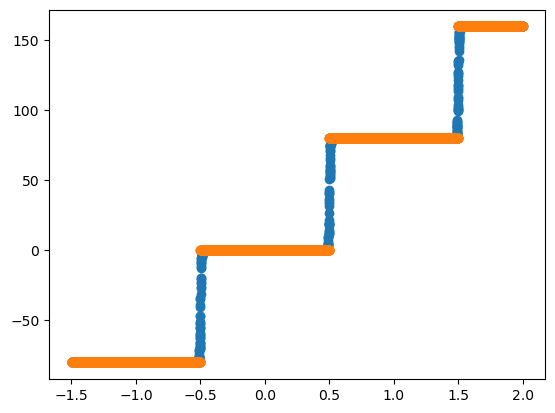

In [92]:
y = [N_sl_train.forward(sl_train['x'].values[i].reshape(1, 1))[0][0] for i in range(len(sl_train['x'].values))]
plt.scatter(sl_train['x'], y)
plt.scatter(sl_train['x'], sl_train['y'])

### Steps-large MSE

In [93]:
np.mean((np.array(y)-sl_train['y']) ** 2)

7.1021133736111315